In [1]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [2]:
moviedata = pd.read_csv("datasets/rotten_tomatoes_movies.csv")
reviewdata = pd.read_csv("datasets/rotten_tomatoes_critic_reviews_50k.csv")

In [3]:
moviedata.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
reviewdata.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


## Predicting movie status based on the numerical and categorical features

In [5]:
moviedata.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


### Data Preprocessing

Data Preprocessing #1: the content_rating feature

In [7]:
print(f'Content Rating Category: {moviedata.content_rating.unique()}')

Content Rating Category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


There's a few different ratings in there. Let's see what their distribution is like.

[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

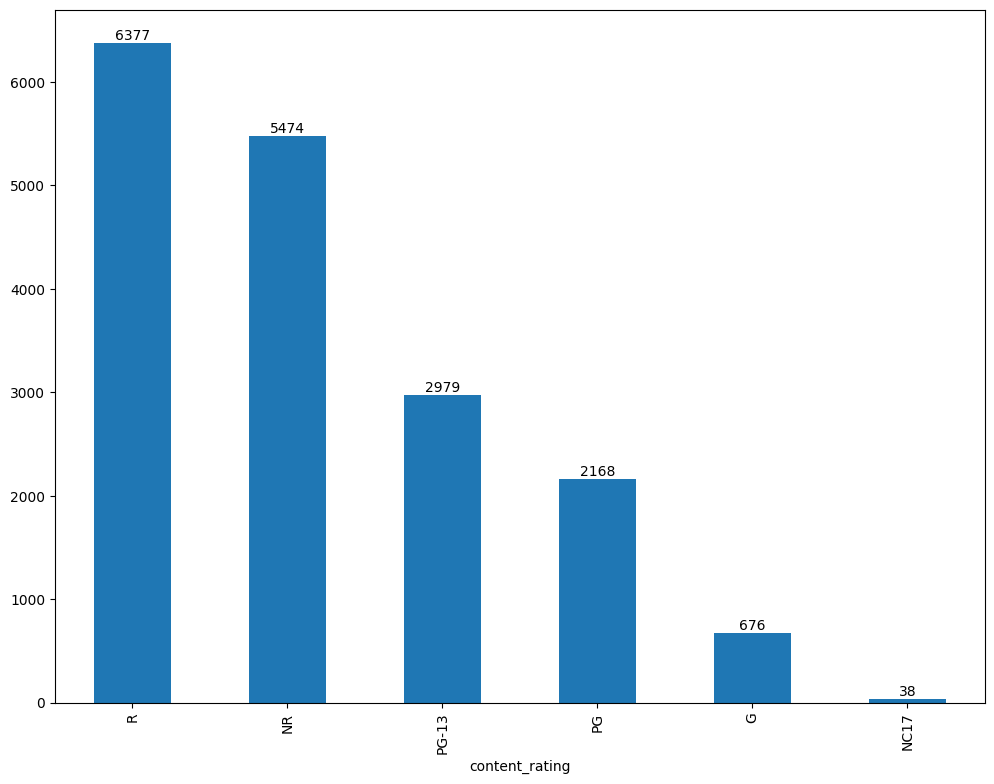

In [8]:
ax = moviedata.content_rating.value_counts().plot(kind="bar", figsize=(12,9))
ax.bar_label(ax.containers[0])

We'll have to encode the content rating feature before we can proceed. Since there's no inherent order between the categories, we'll use dummy encoding, which is similar to one-hot encoding.

In [9]:
content_rating = pd.get_dummies(moviedata.content_rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,False,False,False,True,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,True,False,False,False
4,True,False,False,False,False,False


Data Preprocessing #2: audience_status feature

In [11]:
content_rating.replace({False: 0, True: 1}, inplace=True)
content_rating.head()
print(f'Audience Status Category: {moviedata.audience_status.unique()}')

Audience Status Category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

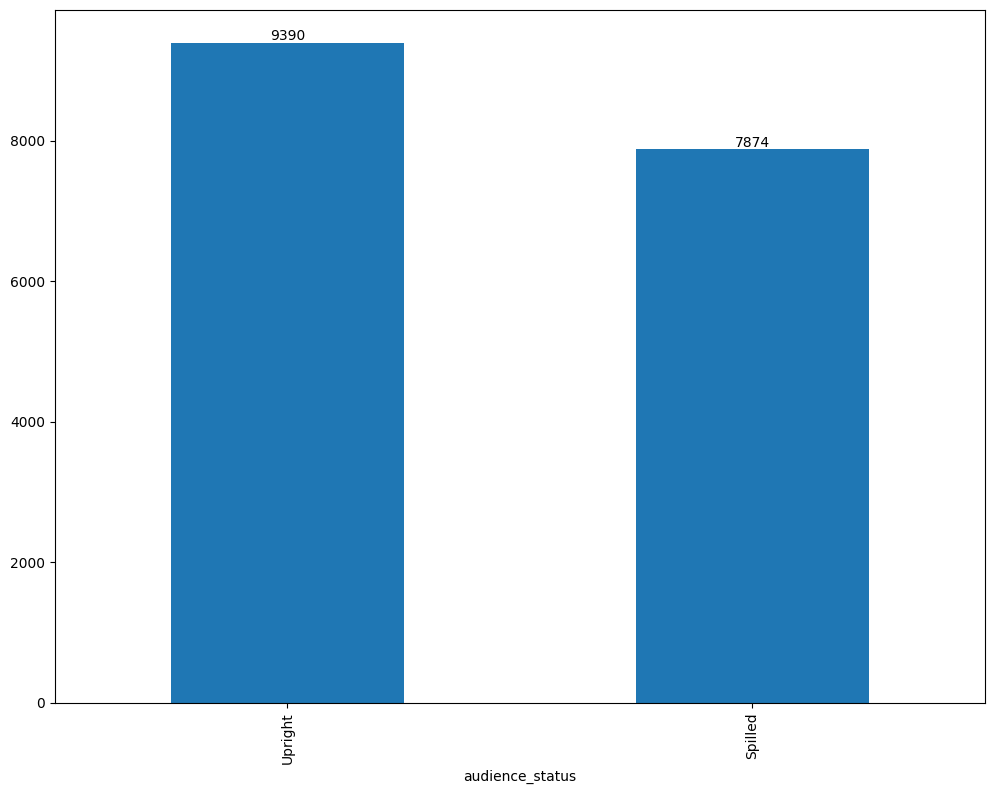

In [12]:
ax = moviedata['audience_status'].value_counts().plot(kind = "bar", figsize = (12, 9))
ax.bar_label(ax.containers[0])

Since there _is_ an inherent order between the categories (Upright is better than Spilled), we'll use ordinal encoding to encode this feature.

In [13]:
audience_status = pd.DataFrame(moviedata['audience_status'].replace(['Spilled', 'Upright'], [0, 1]))
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


Data Preprocessing #3: tomatometer_status feature - this is our target feature

[Text(0, 0, '7565'), Text(0, 0, '6844'), Text(0, 0, '3259')]

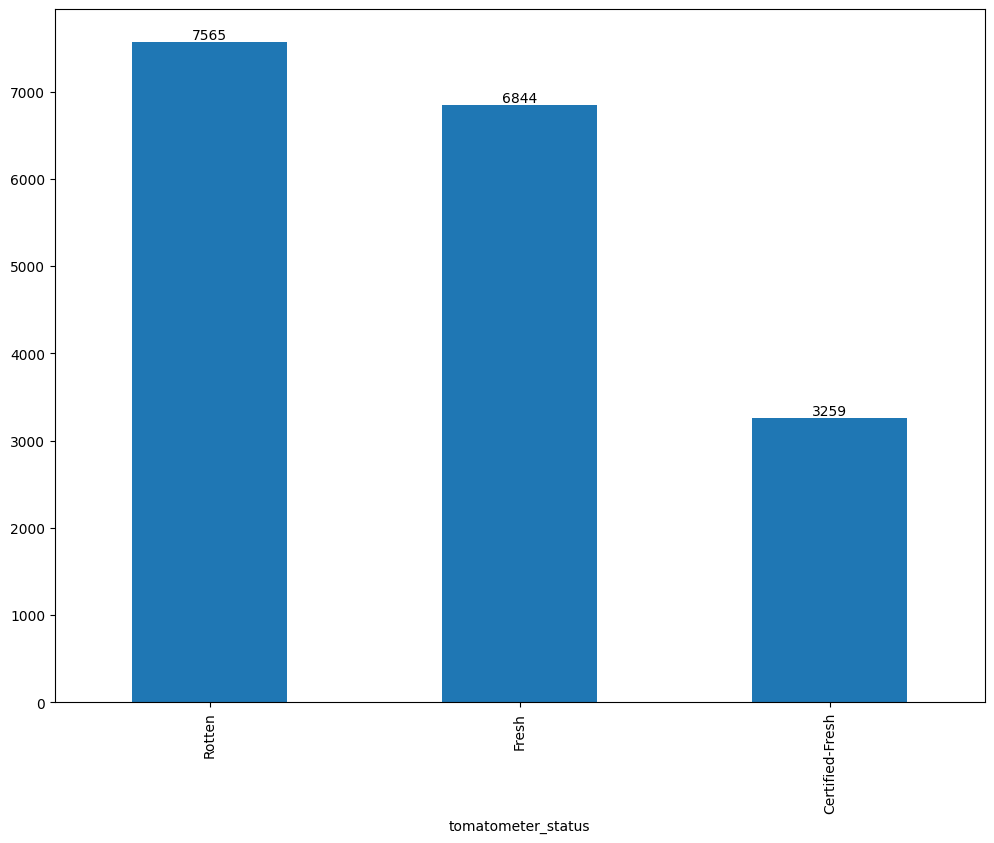

In [14]:
ax = moviedata['tomatometer_status'].value_counts().plot(kind = "bar", figsize = (12, 9))
ax.bar_label(ax.containers[0])

As we can see, the distribution of classes in the tomatometer_status categorical feature is skewed. We'll deal with this later. For now, let us similarly ordinal encode this feature.

In [15]:
tomatometer_status = pd.DataFrame(moviedata['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0, 1, 2]))
tomatometer_status.head()

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


Let's combine all of these features and the previously numerical features into one dataframe.

In [16]:
moviedata.select_dtypes(include=np.number).columns.tolist()

['runtime',
 'tomatometer_rating',
 'tomatometer_count',
 'audience_rating',
 'audience_count',
 'tomatometer_top_critics_count',
 'tomatometer_fresh_critics_count',
 'tomatometer_rotten_critics_count']

In [17]:
# Combine all of the features together into one dataframe
df_features = pd.concat([moviedata[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]
                        , content_rating, audience_status, tomatometer_status], axis=1).dropna()
df_features.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


In [18]:
df_features.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


## Model Training

In [20]:
%pip install scikit-learn
#let's divide our data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features.drop(['tomatometer_status'], axis = 1), df_features['tomatometer_status'], test_size=0.2)
print(f'Size of training data is {len(X_train)}, size of test data is {len(X_test)}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 27.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 30.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Size of training data is 13613, size of test data is 3404


### Constrained Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes=3)

In [22]:
tree_3_leaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_predict = tree_3_leaf.predict(X_test)

tree_3_leaf_acc = accuracy_score(y_test, y_predict)
print(f'Accuracy score for constrained decision tree: {tree_3_leaf_acc}')
print(classification_report(y_test, y_predict))

Accuracy score for constrained decision tree: 0.936545240893067
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1441
         1.0       1.00      0.84      0.91      1339
         2.0       0.74      1.00      0.85       624

    accuracy                           0.94      3404
   macro avg       0.91      0.95      0.92      3404
weighted avg       0.95      0.94      0.94      3404



This is not bad accuracy for a start. Let's plot the confusion matrix and see what our predictions look like.

[[1441    0    0]
 [   0 1125  214]
 [   0    2  622]]


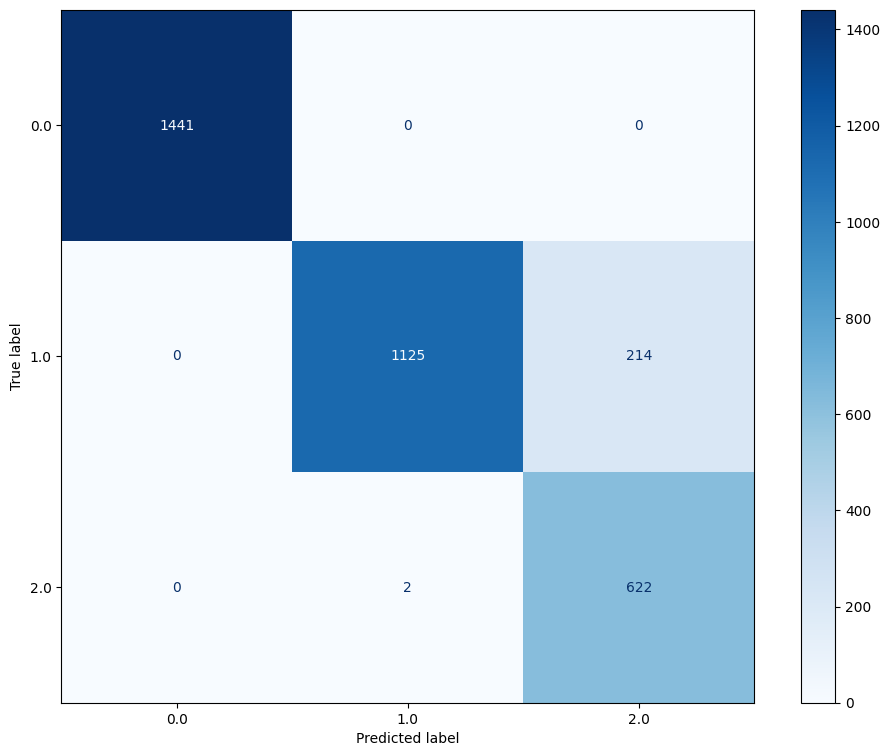

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (12, 9))
disp = ConfusionMatrixDisplay.from_estimator(tree_3_leaf, X_test, y_test, cmap = plt.cm.Blues, ax=ax)
print(disp.confusion_matrix)

We have a lot of movies that are 'Fresh', but our model predicted them as 'Certified-Fresh'

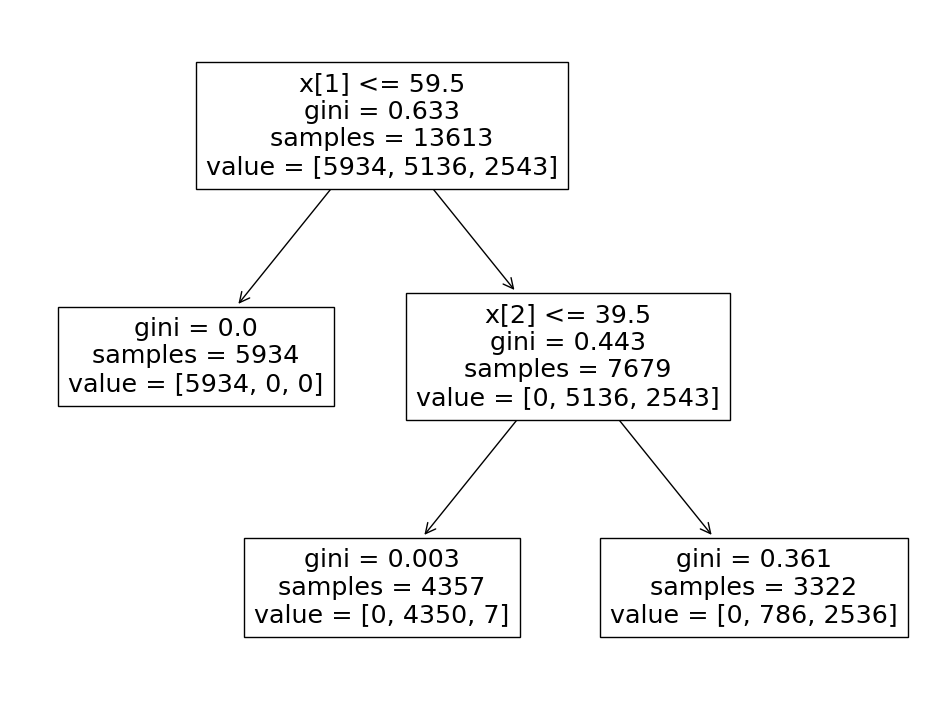

In [25]:
# Visualize decision logic of decision tree model
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(tree_3_leaf, ax = ax)
plt.show()

### Unconstrained Decision Tree Classifier

In [26]:
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)

y_predict = decision_tree_classifier.predict(X_test)

decision_tree_classifier_acc = accuracy_score(y_test, y_predict)
print(f'Accuracy score for constrained decision tree: {decision_tree_classifier_acc}')
print(classification_report(y_test, y_predict))

Accuracy score for constrained decision tree: 0.9879553466509988
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1441
         1.0       0.98      0.99      0.98      1339
         2.0       0.97      0.96      0.97       624

    accuracy                           0.99      3404
   macro avg       0.98      0.98      0.98      3404
weighted avg       0.99      0.99      0.99      3404



Much better accuracy this time around.

[[1441    0    0]
 [   0 1320   19]
 [   0   22  602]]


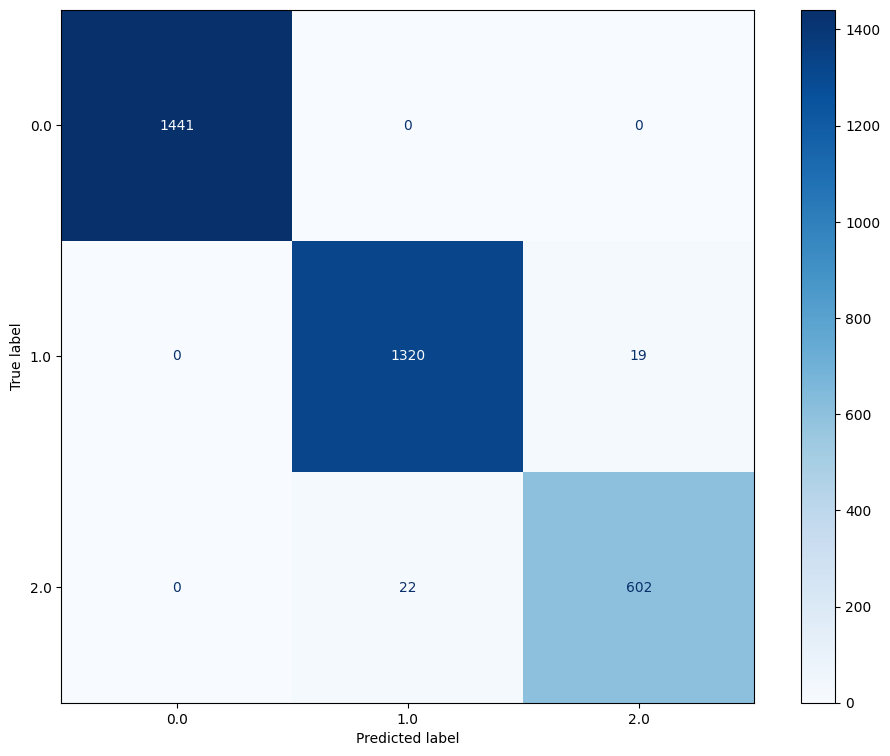

In [27]:
fig, ax = plt.subplots(figsize = (12, 9))
disp = ConfusionMatrixDisplay.from_estimator(decision_tree_classifier, X_test, y_test, cmap = plt.cm.Blues, ax=ax)
print(disp.confusion_matrix)

The few false predictions that we have are still coming from confusion between 'Fresh' and 'Certified-Fresh'

Now let's try a random forest classifier to see if we can't get the accuracy up 

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

#instantiate
random_forest_classifier = RandomForestClassifier()

#fit the model
random_forest_classifier.fit(X_train, y_train)

#get some predictions
predictions_rf_classifier = random_forest_classifier.predict(X_test)

#print the accuracy
acc_rf_classifier = accuracy_score(y_test, predictions_rf_classifier)
print(f'Accuracy score for the Random Forest Classifier: {acc_rf_classifier}')
print(classification_report(y_test, predictions_rf_classifier))

Accuracy score for the Random Forest Classifier: 0.9894242068155111
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1441
         1.0       0.98      0.99      0.99      1339
         2.0       0.98      0.97      0.97       624

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



[[1441    0    0]
 [   0 1324   15]
 [   0   21  603]]


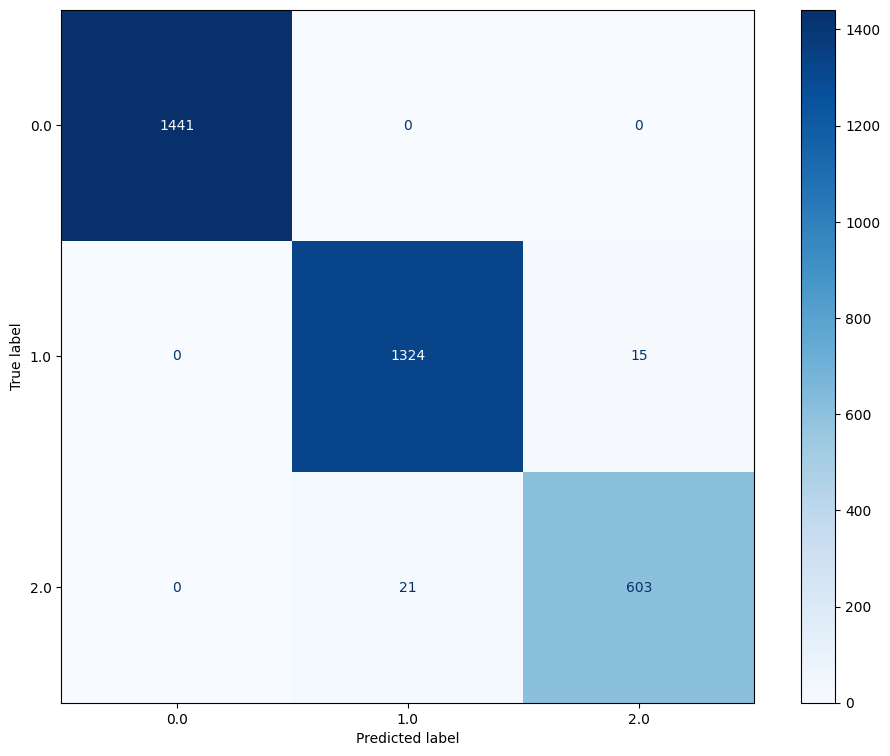

In [29]:
fig, ax = plt.subplots(figsize = (12, 9))
disp = ConfusionMatrixDisplay.from_estimator(random_forest_classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
print(disp.confusion_matrix)

We've got a much better classifier here, but could we do a little better? Maybe if we used some regularization by feature selection? For that, we'd need to know which of the features are important to the above predictions.

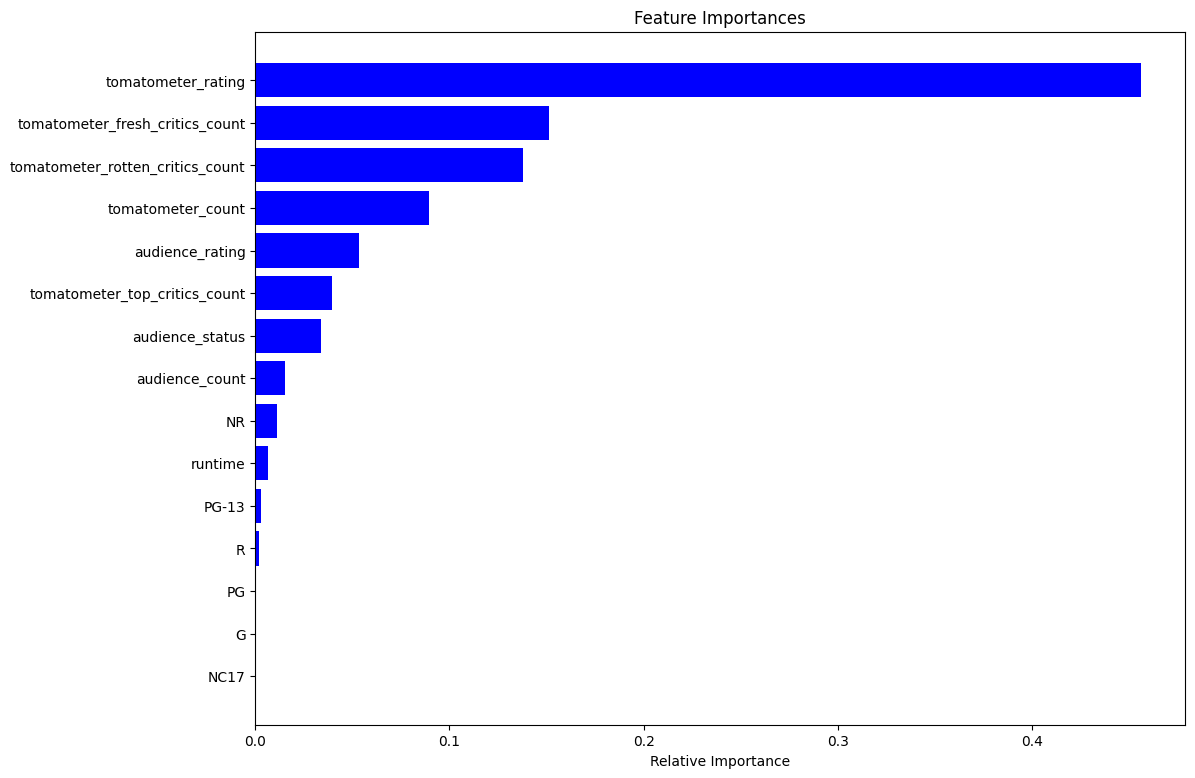

In [30]:
#Get the feature importances
feature_importances = random_forest_classifier.feature_importances_

#get the feature importances from most to least important
indices = np.argsort(feature_importances)

#visualize the feature importances
plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), feature_importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.show()

As we can see, some of these features are clearly more important than others. We could try training the random forest classifier with just these features and see how we fare.

### Random Forest Classifier with Feature Selection

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(['tomatometer_status', 'runtime', 'NC17', 'G', 'PG', 'PG-13', 'R', 'NR'], axis = 1), df_features['tomatometer_status'], test_size=0.2)

In [32]:
rf_classifier_feature_selection = RandomForestClassifier()

rf_classifier_feature_selection.fit(X_train, y_train)

predictions_rf_feature_selection = rf_classifier_feature_selection.predict(X_test)

acc_rf_feature_selection = accuracy_score(y_test, predictions_rf_feature_selection)
print(f'Accuracy for RF Classifier with Feature Selection: {acc_rf_feature_selection}')
print(classification_report(y_test, predictions_rf_feature_selection))

Accuracy for RF Classifier with Feature Selection: 0.9920681551116334
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1483
         1.0       0.99      0.99      0.99      1283
         2.0       0.99      0.97      0.98       638

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



[[1483    0    0]
 [   0 1275    8]
 [   0   19  619]]


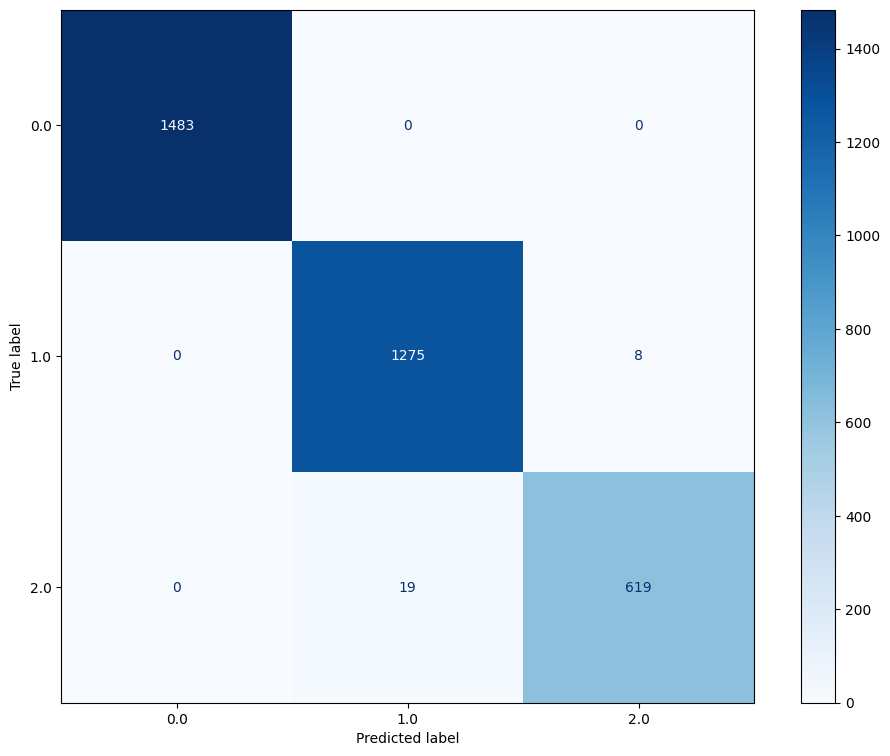

In [33]:
fig, ax = plt.subplots(figsize = (12, 9))
disp = ConfusionMatrixDisplay.from_estimator(rf_classifier_feature_selection, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
print(disp.confusion_matrix)

We've gained some accuracy on the last classifier. Now let's see if we can do something with the distribution of the target variable that we saw at the start of the analysis.

In [34]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced', classes = np.unique(df_features['tomatometer_status']), y = df_features['tomatometer_status'].values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

This time, we'll initialise the Random Forest model with these class weights, which it'll take into account while training the model.

In [35]:
class_weighted_rf_classifier = RandomForestClassifier(class_weight=class_weight_dict)

class_weighted_rf_classifier.fit(X_train, y_train)
prediction_class_weighted_rf = class_weighted_rf_classifier.predict(X_test)
acc_class_weighted_rf = accuracy_score(y_test, prediction_class_weighted_rf)
print(f'Accuracy of the class-weighted RF Classifier is: {acc_class_weighted_rf}')
print(classification_report(y_test, prediction_class_weighted_rf))

Accuracy of the class-weighted RF Classifier is: 0.9923619271445359
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1483
         1.0       0.99      0.99      0.99      1283
         2.0       0.99      0.97      0.98       638

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



This is about the same accuracy as our previous model. Thus, using the distribution of the target variable didn't aid us much in this particular case, which is likely because the distribution wasn't too skewed.

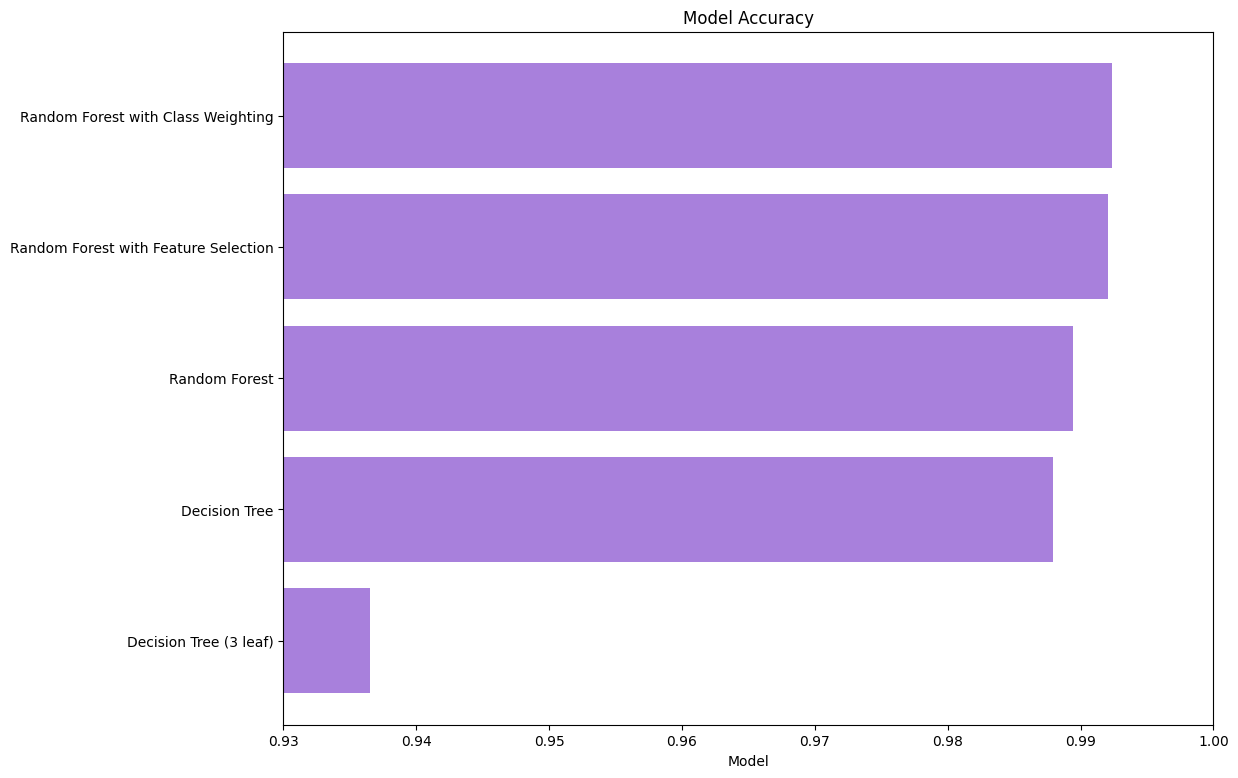

In [36]:
all_models = ['Decision Tree (3 leaf)', 'Decision Tree', 'Random Forest', 'Random Forest with Feature Selection', 'Random Forest with Class Weighting']
all_accuracies = [tree_3_leaf_acc, decision_tree_classifier_acc, acc_rf_classifier, acc_rf_feature_selection, acc_class_weighted_rf]

color1 = '#A880DC' # Light purple

fig, ax = plt.subplots(figsize = (12, 9))

ax.barh(all_models, all_accuracies, color=color1)
ax.set_xlabel('Model')
ax.set_title('Model Accuracy')
ax.set_xlim(0.93,1)
plt.show()

As we can see, the Random Forest completely outclasses the decision tree in this problem. More specifically, after feature selection we're plateauing on the accuracy.

# Approach 2: Vectorising the text reviews and using Sentiment Analysis

We have another dataset at our disposal that has reviews for the movies we have. We could use this information to predict movie status. For this, we'd have to vectorise the text to extract information out of it for sentiment analysis. Since our target categories are ordinal, we should be able to draw some conclusion about how highly rated a movie is based on a positive sentiment.

In [37]:
df_merged = reviewdata.merge(moviedata, how = 'inner', on = ['rotten_tomatoes_link'])
df_merged.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [38]:
df_merged = df_merged[['rotten_tomatoes_link', 'movie_title', 'review_content', 'review_type', 'tomatometer_status']]

In [39]:
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [40]:
#drop entries with missing reviews
df_merged = df_merged.dropna(subset=['review_content'])

[Text(0, 0, '25276'), Text(0, 0, '15919')]

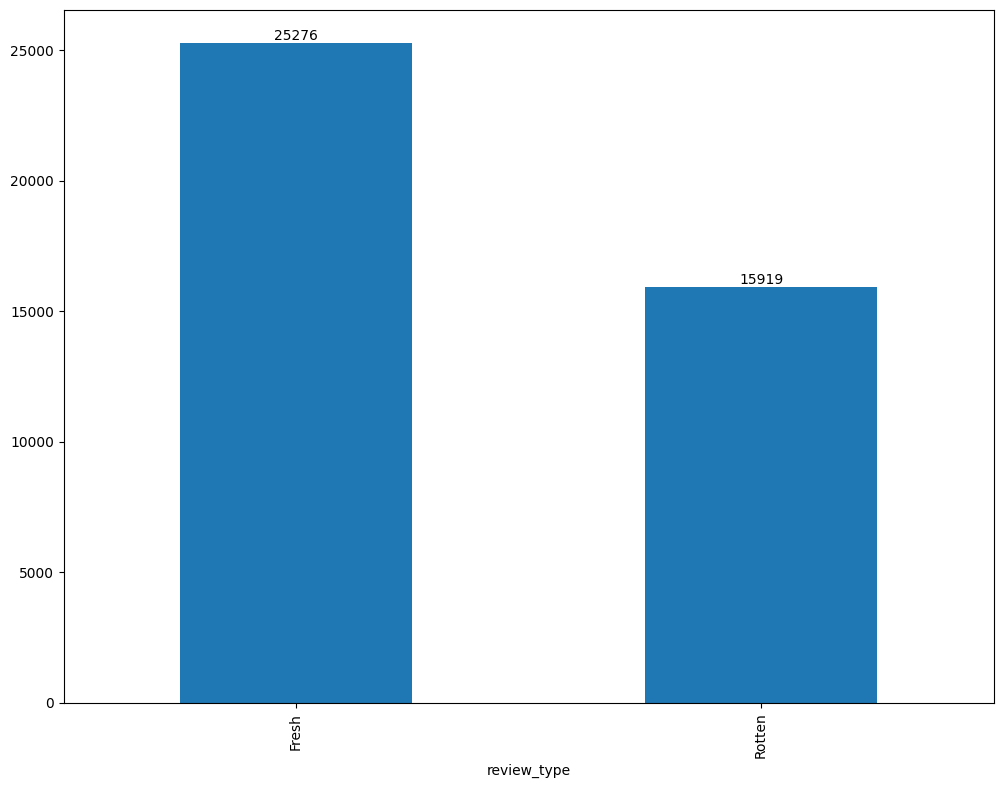

In [41]:
ax = df_merged['review_type'].value_counts().plot(kind = 'bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [42]:
review_type = pd.DataFrame(df_merged['review_type'].replace(['Rotten', 'Fresh'], [0,1]))
df_feature_critics = pd.concat([df_merged[['review_content']], review_type], axis = 1).dropna()
df_feature_critics.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


Now we have the text reviews and their review type. We need to vectorise the text reviews before we can train a model on it.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

df_subset = df_feature_critics[0:5000]
X_train, X_test, y_train, y_test = train_test_split(df_subset['review_content'], df_subset['review_type'], test_size = 0.2)

#instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

#transform our text data into vectors
X_train_vec = vectorizer.fit_transform(X_train).toarray()

In [51]:
#initialize random forest and train it on this data
rf_vec = RandomForestClassifier()
rf_vec.fit(X_train_vec, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       473
           1       0.70      0.74      0.72       527

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000

[[303 170]
 [139 388]]


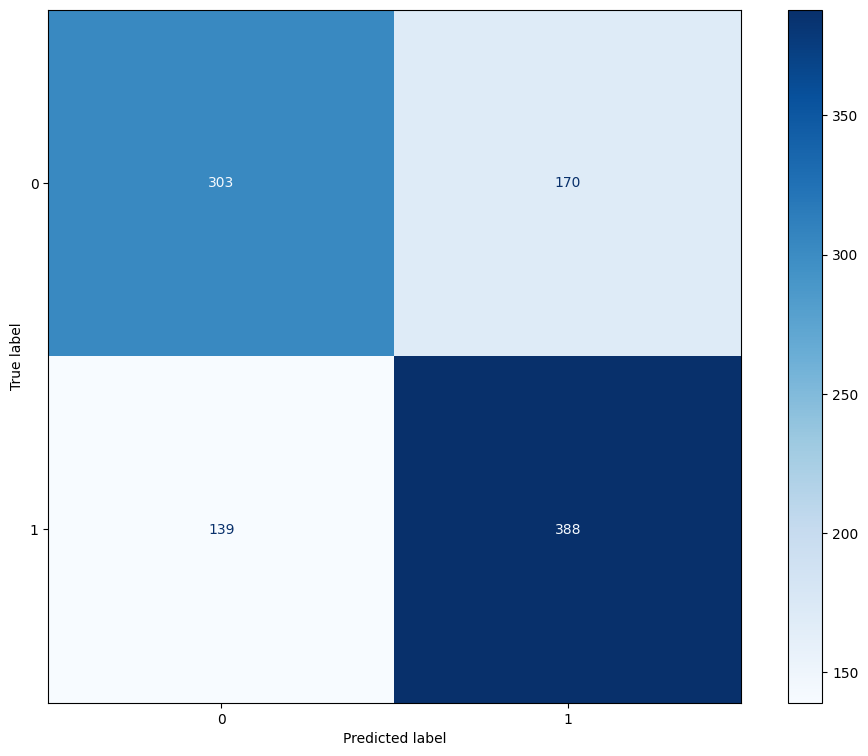

In [52]:
y_predicted = rf_vec.predict(vectorizer.transform(X_test).toarray())

print(classification_report(y_test, y_predicted))

fig, ax = plt.subplots(figsize = (12, 9))
disp = ConfusionMatrixDisplay.from_estimator(rf_vec, vectorizer.transform(X_test).toarray(), y_test, cmap=plt.cm.Blues, ax=ax)
print(disp.confusion_matrix)

Making this a weighted random forest yields about the same result.

Let's try making some predictions.

### Movie Status Prediction

In [53]:
def predict_movie_status(prediction):
    positive_percentage = (prediction == 1).sum() / len(prediction) * 100
    
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    
    print(f'Positive Review:{positive_percentage}')
    print(f'Movie Status:{prediction}')

In [55]:
titles = df_merged.movie_title.unique()

In [56]:
titles[0:50]

array(['Percy Jackson & the Olympians: The Lightning Thief',
       'Please Give', '10', '12 Angry Men (Twelve Angry Men)',
       '20,000 Leagues Under The Sea', '10,000 B.C.', 'The 39 Steps',
       '3:10 to Yuma', 'Charly (A Heartbeat Away)', 'Abraham Lincoln',
       'Dark Water', 'The Accused', 'The Lost City', 'The Breaking Point',
       "Adam's Rib", 'The Bridge of San Luis Rey',
       'The Prowler (Cost of Living )', 'Criminal',
       'The Adventures of Mark Twain', 'Deep Blue',
       'The Adventures of Robin Hood', 'Man Hunt', 'Dead End',
       'Bandwagon', 'Whore', 'Tristan & Isolde', 'Wild Side',
       'A Tale of Two Pizzas', 'Running Scared', 'Going the Distance',
       'Ultraviolet', 'Home of the Brave',
       'Arthur and the Invisibles (Arthur and the Minimoys)',
       'Malevolence', 'Eternal', 'A Farewell To Arms',
       'The Narrow Margin', 'The Matador', 'Smile',
       "The Intruder (L'Intrus)", 'Saint Ralph', 'The Baxter',
       'Oliver Twist', 'The Alamo'

Status prediction for Moonlight

In [57]:
df_moonlight = df_merged.loc[df_merged['movie_title'] == 'Moonlight']
df_moonlight.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
2244,m/10006057-moonlight,Moonlight,"With no common language, these two connect ins...",Fresh,Fresh
2245,m/10006057-moonlight,Moonlight,"A contrived, rather unpleasant English-lingo t...",Rotten,Fresh
2246,m/10006057-moonlight,Moonlight,"Van der Oest possesses a sure visual sense, an...",Fresh,Fresh
2247,m/10006057-moonlight,Moonlight,"The situation compels you to keep watching, on...",Rotten,Fresh
2248,m/10006057-moonlight,Moonlight,Not only is the candid (but never prurient) tr...,Fresh,Fresh


In [58]:
y_predicted_moonlight = rf_vec.predict(vectorizer.transform(df_moonlight['review_content']).toarray())

predict_movie_status(y_predicted_moonlight)

Positive Review:60.0
Movie Status:Fresh


In [60]:
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Moonlight'].unique()

array(['Fresh'], dtype=object)

We could similarly get the status predictions for other movies based on the text reviews. An extension that can be made to these models is to use the text reviews in tandem with the numerical and categorical features from the first dataset.